In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

**DATA SET LINK** -> https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

In [2]:
df=pd.read_csv('stroke-data.csv')
df.drop(columns='id')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [5]:
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [6]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [8]:
df["work_type"]=df["work_type"].str.replace("children","0")
df["work_type"]=df["work_type"].str.replace("Govt_job","1")
df["work_type"]=df["work_type"].str.replace("Never_worked","2")
df["work_type"]=df["work_type"].str.replace("Private","3")
df["work_type"]=df["work_type"].str.replace("Self-employed","4")

df["work_type"]=df["work_type"].astype("int32")

In [9]:
df=df[(df['gender'] != 'Other')]
df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [10]:
df["gender"]=df["gender"].str.replace("Male","1")
df["gender"]=df["gender"].str.replace("Female","0")
df["gender"]=df["gender"].astype("int32")

In [11]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [12]:
df["ever_married"]=df["ever_married"].str.replace("Yes","1")
df["ever_married"]=df["ever_married"].str.replace("No","0")
df["ever_married"]=df["ever_married"].astype("int32")

In [13]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [14]:
df["Residence_type"]=df["Residence_type"].str.replace("Rural","0")
df["Residence_type"]=df["Residence_type"].str.replace("Urban","1")
df["Residence_type"]=df["Residence_type"].astype("int32")

In [15]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [16]:
df["smoking_status"]=df["smoking_status"].str.replace("never smoked","0")
df["smoking_status"]=df["smoking_status"].str.replace("formerly smoked","1")
df["smoking_status"]=df["smoking_status"].str.replace("Unknown","2")
df["smoking_status"]=df["smoking_status"].str.replace("smokes","3")
df["smoking_status"]=df["smoking_status"].astype("int32")

In [17]:
df['bmi'].fillna(df.bmi.median(),inplace=True)

In [18]:
df.gender.value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

In [19]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int32  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int32  
 6   work_type          5109 non-null   int32  
 7   Residence_type     5109 non-null   int32  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int32  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 419.1 KB


In [21]:
df.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [22]:
countinous_data= ['avg_glucose_level','age','bmi']
descrete_data=['stroke','work_type','heart_disease','hypertension','smoking_status','Residence_type','gender']

<Axes: >

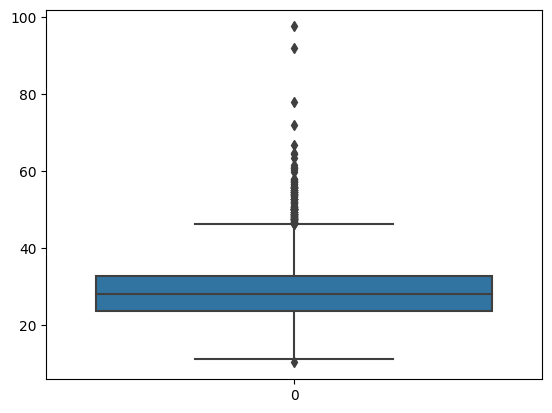

In [23]:
sns.boxplot(df.bmi)

<Axes: >

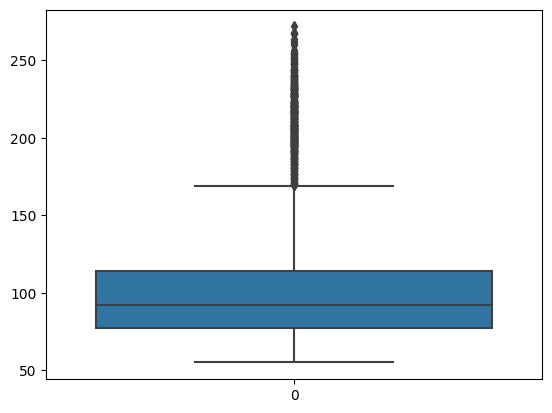

In [24]:
sns.boxplot(df.avg_glucose_level)

In [25]:
pd.crosstab(df.heart_disease,df.stroke,margins=True)

stroke,0,1,All
heart_disease,,,
0,4631,202,4833
1,229,47,276
All,4860,249,5109


In [26]:
pd.crosstab(df.work_type,df.stroke,margins=True)

stroke,0,1,All
work_type,,,
0,685,2,687
1,624,33,657
2,22,0,22
3,2775,149,2924
4,754,65,819
All,4860,249,5109


In [27]:
pd.crosstab(df.smoking_status,df.stroke,margins=True)

stroke,0,1,All
smoking_status,,,
0,1802,90,1892
1,814,70,884
2,1497,47,1544
3,747,42,789
All,4860,249,5109


In [28]:
pd.crosstab(df.Residence_type,df.stroke,margins=True)

stroke,0,1,All
Residence_type,,,
0,2399,114,2513
1,2461,135,2596
All,4860,249,5109


In [29]:
corr=df[['age','bmi']].corr()
corr

,age,bmi
age,1.000000,0.324211
bmi,0.324211,1.000000


<Axes: >

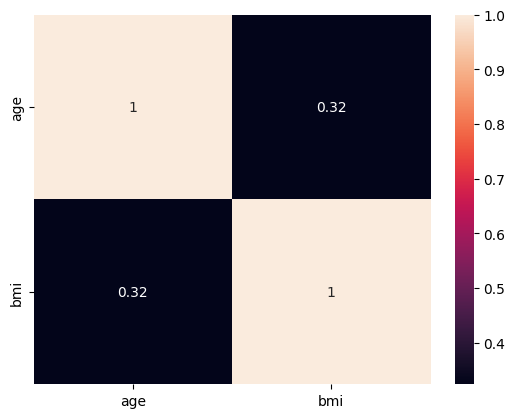

In [30]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='heart_disease', ylabel='age'>

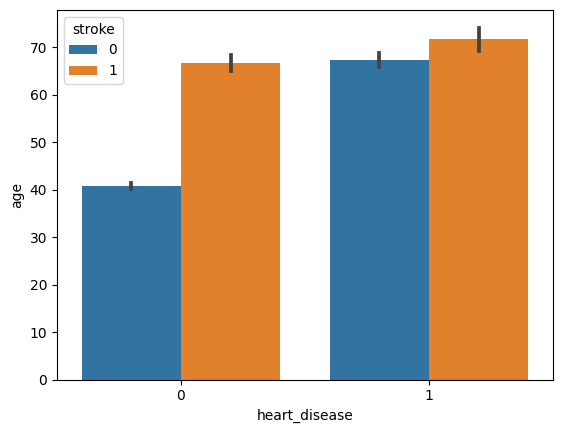

In [31]:
sns.barplot(y=df.age,x='heart_disease',hue='stroke',data=df)

# data cleaning

- missing value replace

In [32]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
import copy
df1=copy.deepcopy(df)
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,3,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,4,0,202.21,28.1,0,1
2,31112,1,80.0,0,1,1,3,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,3,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,4,0,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,3,1,83.75,28.1,0,0
5106,44873,0,81.0,0,0,1,4,1,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,4,0,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,3,0,166.29,25.6,1,0


# treating outlier

In [34]:
from feature_engine.outliers import Winsorizer

In [35]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['avg_glucose_level'],tail='both',fold=1.5)

df1['avg_glucose_level']=win.fit_transform(df1[['avg_glucose_level']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'avg_glucose_level': 21.964999999999982} {'avg_glucose_level': 169.365}


In [36]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['bmi'],tail='both',fold=1.5)

df1['bmi']=win.fit_transform(df1[['bmi']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'bmi': 10.300000000000006} {'bmi': 46.29999999999999}


<Axes: >

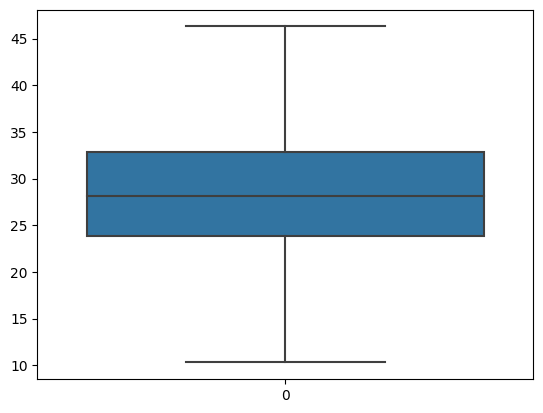

In [37]:
sns.boxplot(df1['bmi'])

<Axes: >

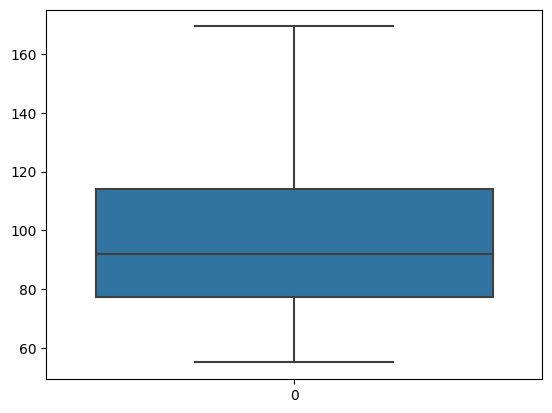

In [38]:
sns.boxplot(df1['avg_glucose_level'])

In [39]:
df1.age.skew()

-0.13743019262921288

In [40]:
df1.bmi.skew()

0.44892268083067866

In [41]:
df1.avg_glucose_level.skew()

0.9361612939085261

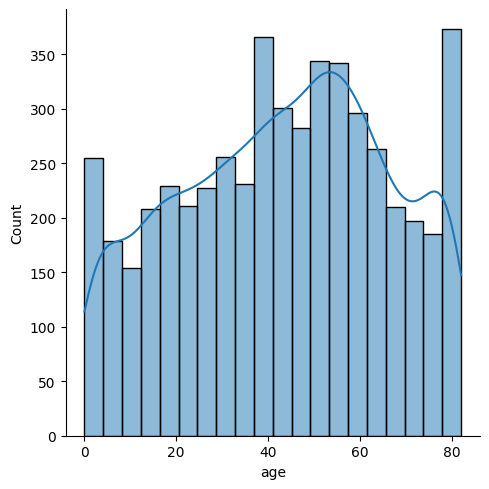

In [42]:
sns.displot(df1.age,kde=True)

# Encoading

In [43]:
import copy
df2=copy.deepcopy(df1)
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,3,1,169.365,36.6,1,1
1,51676,0,61.0,0,0,1,4,0,169.365,28.1,0,1
2,31112,1,80.0,0,1,1,3,0,105.920,32.5,0,1
3,60182,0,49.0,0,0,1,3,1,169.365,34.4,3,1
4,1665,0,79.0,1,0,1,4,0,169.365,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,3,1,83.750,28.1,0,0
5106,44873,0,81.0,0,0,1,4,1,125.200,40.0,0,0
5107,19723,0,35.0,0,0,1,4,0,82.990,30.6,0,0
5108,37544,1,51.0,0,0,1,3,0,166.290,25.6,1,0


In [44]:
df2.work_type.value_counts()

work_type
3    2924
4     819
0     687
1     657
2      22
Name: count, dtype: int64

In [45]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,3,1,169.365,36.6,1,1
1,51676,0,61.0,0,0,1,4,0,169.365,28.1,0,1
2,31112,1,80.0,0,1,1,3,0,105.920,32.5,0,1
3,60182,0,49.0,0,0,1,3,1,169.365,34.4,3,1
4,1665,0,79.0,1,0,1,4,0,169.365,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,3,1,83.750,28.1,0,0
5106,44873,0,81.0,0,0,1,4,1,125.200,40.0,0,0
5107,19723,0,35.0,0,0,1,4,0,82.990,30.6,0,0
5108,37544,1,51.0,0,0,1,3,0,166.290,25.6,1,0


In [46]:
df2.drop(['id'],axis='columns',inplace =True)

In [47]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,169.365,36.6,1,1
1,0,61.0,0,0,1,4,0,169.365,28.1,0,1
2,1,80.0,0,1,1,3,0,105.920,32.5,0,1
3,0,49.0,0,0,1,3,1,169.365,34.4,3,1
4,0,79.0,1,0,1,4,0,169.365,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,3,1,83.750,28.1,0,0
5106,0,81.0,0,0,1,4,1,125.200,40.0,0,0
5107,0,35.0,0,0,1,4,0,82.990,30.6,0,0
5108,1,51.0,0,0,1,3,0,166.290,25.6,1,0


In [48]:
# df2.to_csv('stroke_clean.csv',index =False)

In [49]:
X= df2.drop('stroke',axis = 1)
y = df2['stroke']

In [50]:
import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(X, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

(9720, 10)
(9720,)


In [51]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 0.9998713991769548
Test accuracy: 0.9089506172839507
********************
[0.89921722 0.9109589  0.90019569 0.91780822 0.91283056]
0.9082021194830286
********************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       972
           1       0.89      0.93      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

********************
90.9% Accurate
********************


In [53]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.948045267489712
train accuracy: 0.9998713991769548
********************
0.9479354303271226
********************
********************
94.8% Accurate


# Logistic regression

In [54]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.8009259259259259
train accuracy: 0.8032407407407407
********************
0.9512626238425549
********************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       972
           1       0.89      0.93      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

********************
80.09% Accurate


In [55]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9506172839506173
train accuracy: 0.9917695473251029
********************
0.9408877371672375
********************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       972
           1       0.89      0.93      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

********************
95.06% Accurate


In [56]:
from sklearn.ensemble import AdaBoostClassifier
# random forest

ada=AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction,y_test)
print(f"{round(ada_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.8446502057613169
train accuracy: 0.8506944444444444
********************
0.9504800366472377
********************
********************
84.47% Accurate


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.875
train accuracy: 0.8843878600823045
********************
0.9477399272805334
********************
********************
87.5% Accurate


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.8955761316872428
Train accuracy: 0.9212962962962963
********************
Confusion Matrix:
[[789 183]
 [ 20 952]]
********************
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       972
           1       0.84      0.98      0.90       972

    accuracy                           0.90      1944
   macro avg       0.91      0.90      0.89      1944
weighted avg       0.91      0.90      0.89      1944

********************
89.56% Accurate


In [59]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.950617
1,Random Forest,0.948045
0,Decision Tree,0.908951
3,Knn,0.895576
6,GradientBoostingClassifier,0.875000
5,AdaBoost,0.844650
2,Logistic Regression,0.800926


In [60]:
# import pickle
# #save the model
# model = ada  # Your machine learning model object
# file_path = 'ada_strok.pkl'  # Path to the file where you want to save the model

# with open(file_path, 'wb') as file:
#     pickle.dump(model, file)


In [61]:
# # load the model
# import pickle

# file_path = 'ada_strok.pkl'  # Path to the saved model file

# with open(file_path, 'rb') as file:
#     loaded_model = pickle.load(file)

In [62]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3436,1,32.000000,0,0,1,3,0,82.680000,29.200000,0
8311,1,80.567469,0,0,1,3,0,102.180378,33.180963,0
2776,1,2.000000,0,0,0,0,1,107.830000,21.200000,2
9578,0,63.380415,0,0,1,3,0,169.365000,27.346742,0
9405,0,77.946741,0,0,0,4,0,90.179881,27.171622,0
...,...,...,...,...,...,...,...,...,...,...
2895,1,46.000000,0,0,1,3,1,137.770000,29.300000,0
7813,0,48.797717,0,0,1,3,0,73.739061,24.408815,0
905,0,31.000000,0,0,1,3,0,76.260000,35.600000,0
5192,0,57.000000,0,0,1,3,0,169.365000,33.877374,1


In [63]:
# loaded_model.predict([[0,	33.0,	0,	0,	1,	3,	0,	89.820,	27.9,	0.0]])

In [64]:
# loaded_model.predict([[1,42.0,0,0,1,3,1,85.000,29.9,2.0]])

In [65]:
# loaded_model.predict([[1,67,0,1,	1,	3,1,163.865,36.6,1]]) #1